<a href="https://colab.research.google.com/github/devikaajay/DS_Casestudy_regression/blob/main/Case_study_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
df = pd.read_csv('car_age_price.csv')

In [51]:
print(df.head()) # Display the first few rows

   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000


In [52]:
df.info() # Display basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [53]:
print(df.describe()) #descriptive statistics

              Year          Price
count   112.000000     112.000000
mean   2016.669643  483866.044643
std       1.629616   91217.450533
min    2013.000000  300000.000000
25%    2015.000000  423750.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  755000.000000


Visualize the Data

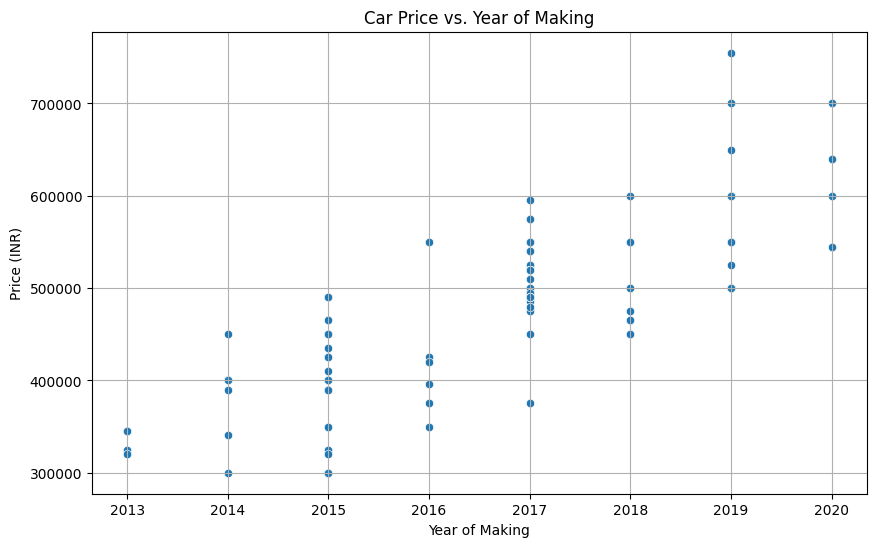

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Car Price vs. Year of Making')
plt.xlabel('Year of Making')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

#Linear Regression Model

In [55]:
# Prepare the data for modeling
X = df[['Year']]
y = df['Price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test
linear_model = LinearRegression()# Create an instance of the Linear Regression model
linear_model.fit(X_train, y_train)# Train the model using the training data
y_pred = linear_model.predict(X_test) # Make predictions on the test data

In [56]:
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print(f"\nLinear Regression Model Performance:")
print(f"  Mean Squared Error: {mse_linear:.2f}")
print(f"  R-squared: {r2_linear:.2f}")
print(f"  Linear Regression Coefficient (Slope): {linear_model.coef_[0]:.2f}")
print(f"  Linear Regression Intercept: {linear_model.intercept_:.2f}")


Linear Regression Model Performance:
  Mean Squared Error: 4326906256.83
  R-squared: 0.37
  Linear Regression Coefficient (Slope): 47608.57
  Linear Regression Intercept: -95520922.49


In [57]:
# Predict the price of a 2022 model
year_2022 = np.array([[2022]]) # Input must be 2D for single feature
pred_price_2022_linear = linear_model.predict(year_2022)
print(f"\nPredicted price for 2022 model: INR {pred_price_2022_linear[0]:.2f}")


Predicted price for 2022 model: INR 743601.62


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


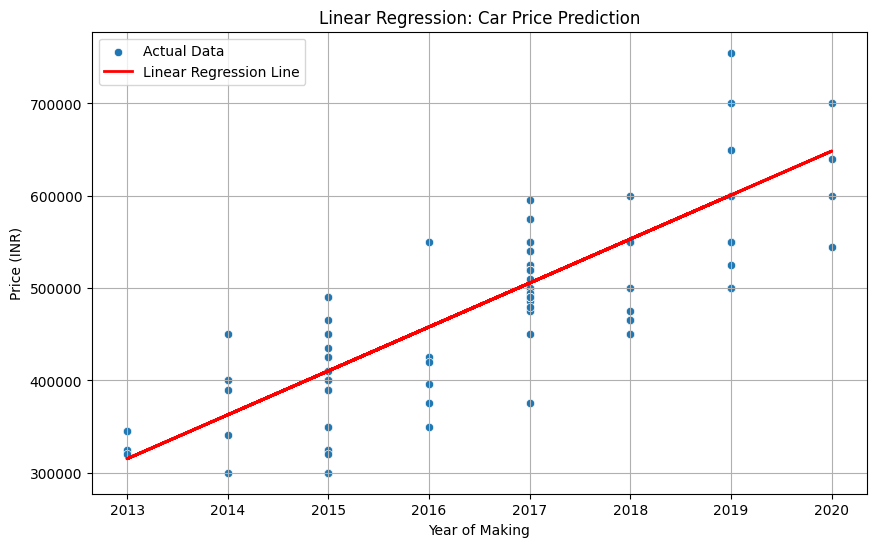

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df, label='Actual Data')
# Use the full range of years for the regression line for better visualization
plt.plot(X, linear_model.predict(X), color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Car Price Prediction')
plt.xlabel('Year of Making')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

#Lasso Regression Model

In [59]:
# Initialize and train
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression Model Performance:")
print(f"  Mean Squared Error: {mse_lasso:.2f}")
print(f"  R-squared: {r2_lasso:.2f}")
print(f"  Lasso Regression Coefficient (Slope): {lasso_model.coef_[0]:.2f}")
print(f"  Lasso Regression Intercept: {lasso_model.intercept_:.2f}")



Lasso Regression Model Performance:
  Mean Squared Error: 4326859771.02
  R-squared: 0.37
  Lasso Regression Coefficient (Slope): 47608.16
  Lasso Regression Intercept: -95520091.25


In [60]:
# Predict the price of a 2022 model using Lasso
year_2022 = np.array([[2022]]) # Input must be 2D
predicted_price_2022_lasso = lasso_model.predict(year_2022)
print(f"\nPredicted price for 2022 model: INR {predicted_price_2022_lasso[0]:.2f}")


Predicted price for 2022 model: INR 743599.37


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


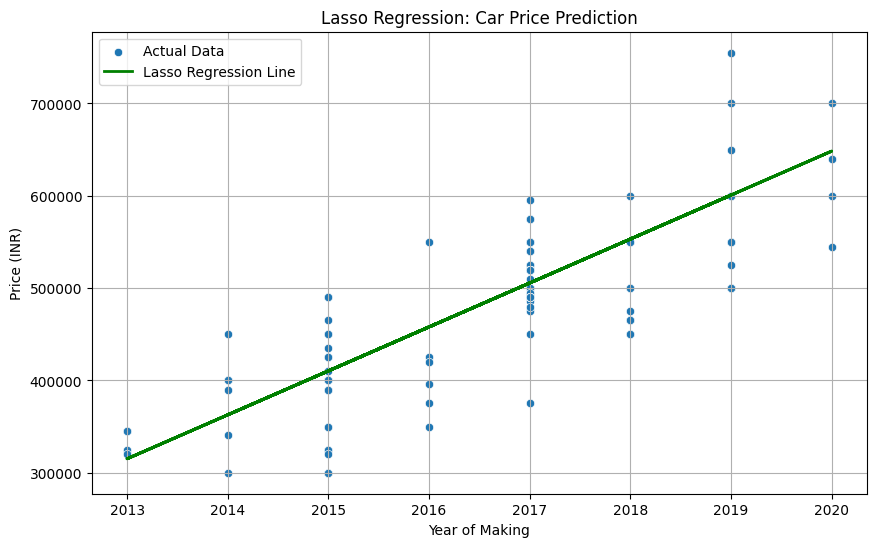

In [61]:
# Visualize the Lasso Regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df, label='Actual Data')
# Use the full range of years for the regression line for better visualization
plt.plot(X, lasso_model.predict(X), color='green', linewidth=2, label='Lasso Regression Line')
plt.title('Lasso Regression: Car Price Prediction')
plt.xlabel('Year of Making')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

#Model Comparison

In [62]:
print("Comparison")
print(f"\nLinear Regression:")
print(f"  MSE: {mse_linear:.2f}")
print(f"  R2 Score: {r2_linear:.2f}")

print(f"\nLasso Regression:")
print(f"  MSE: {mse_lasso:.2f}")
print(f"  R2 Score: {r2_lasso:.2f}")

Comparison

Linear Regression:
  MSE: 4326906256.83
  R2 Score: 0.37

Lasso Regression:
  MSE: 4326859771.02
  R2 Score: 0.37


In [63]:

if r2_linear > r2_lasso:
    print("\nBased on R-squared, Linear Regression is performing better.")
elif r2_lasso > r2_linear:
    print("\nBased on R-squared, Lasso Regression is performing better.")
else:
    print("\nBoth models are performing similarly based on R-squared.")

if mse_linear < mse_lasso:
    print("Based on MSE, Linear Regression is performing better.")
elif mse_lasso < mse_linear:
    print("Based on MSE, Lasso Regression is performing better.")
else:
    print("Both models are performing similarly based on Mean Squared Error.")


Based on R-squared, Lasso Regression is performing better.
Based on MSE, Lasso Regression is performing better.
